# Model of elemntary school in 2020

This Notebook is divided into three parts. 
* Part A: Feature selection to run the models accordingly to Logistic Regression assumptions.Then, we will run our first Models.
* Part B: We will add the 'actionable' features that were not adequate in Part A, and which we consider important.
* Part C: Do Train/ Test and MAPE metrcis to compare the models. Perform some outliers detection to improve performance.

In [3]:
# Scientific libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# model libraries 
from scipy.stats import chi2_contingency, norm
from scipy.stats import chi2_contingency, ttest_ind
import researchpy as rp
import scipy.stats as stats
# Model runners
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.outliers_influence

# Metrics options
from sklearn.metrics import roc_curve, auc

# Plotlib options
plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)
# Pandas options
pd.options.display.max_columns = None

In [4]:
# Dictionary with the purpose of reducing memory size when loading the dataset.
dict_tipos = {
# SIMAT
'ANO_INF':              'uint16',
'CODIGO_DANE':          'uint64',
'CODIGO_DANE_SEDE':     'uint64',
'TIPO_DOCUMENTO':       'uint8',
'NRO_DOCUMENTO':        'string',
'DIRECCION_RESIDENCIA': 'string',
'RES_DEPTO':            'uint8',
'RES_MUN':              'uint16',
'ESTRATO':              'uint8',
'SISBEN':               'float16',
'GENERO':               'uint8',
'POB_VICT_CONF':        'uint8',
'PROVIENE_SECTOR_PRIV': 'uint8',
'PROVIENE_OTR_MUN':     'uint8',
'TIPO_DISCAPACIDAD':    'uint8',
'CAP_EXC':              'uint8',
'CODIGO_ETNIA':         'uint16',
'CODIGO_JORNADA':       'uint8',
'CARACTER':             'uint8',
'CODIGO_ESPECIALIDAD':  'uint8',
'CODIGO_GRADO':         'int8',
'CODIGO_METODOLOGIA':   'uint8',
'REPITENTE':            'uint8',
'SIT_ACAD_ANIO_ANT':    'uint8',
'CON_ALUM_ANIO_ANT':    'uint8',
'ZONA_RESI_ALU':        'uint8',
'EDAD':                 'uint8',
'NIVEL':                'uint8',
'DIR_NUM_LOCALIDAD':    'uint8',
'NIVEL_SISBEN':         'uint8',
'GRADO_OVERAGE':        'uint8',
'OVERAGE':              'uint8',
# SISBEN
'ficha':                'int64',
'comuna':               'uint8',
'barrio':               'uint32',
'nombarrio':            'string',
'direcc':               'string',
'vereda':               'uint8',
'nomvereda':            'string',
'vivienda':             'uint8',
'pared':                'uint8',
'piso':                 'uint8',
'energia':              'uint8',
'alcanta':              'uint8',
'gas':                  'uint8',
'telefono' :            'uint8',
'basura' :              'uint8',
'acueduc' :             'uint8',
'estrato' :             'uint8',
'elimbasura' :          'uint8',
'tcuartosvi' :          'uint8',
'thogar' :              'uint8',
'recolec' :             'uint8',
'tipdir' :              'uint8',
'verifica' :            'uint8',
'hogar' :               'uint8',
'teneviv' :             'uint8',
'tcuartos' :            'uint8',
'tdormir' :             'uint8',
'sanitar' :             'uint8',
'usanitar' :            'uint8',
'usosani' :             'uint8',
'tsanitar' :            'uint8',
'ducha' :               'uint8',
'agua' :                'uint8',
'llega' :               'uint8',
'cuandi' :              'uint8',
'suminis' :             'uint8',
'cuanhoras' :           'uint8',
'preparan' :            'uint8',
'cocina' :              'uint8',
'cocinan' :             'uint8',
'alumbra' :             'uint8',
'usotele' :             'uint8',
'nevera' :              'uint8',
'lavadora' :            'uint8',
'tvcolor' :             'uint8',
'tvcable' :             'uint8',
'calenta' :             'uint8',
'horno' :               'uint8',
'aire' :                'uint8',
'computador' :          'uint8',
'equipo' :              'uint8',
'moto' :                'uint8',
'tractor' :             'uint8',
'tiene_auto' :          'uint8',
'bieraices':            'uint8',
'tpersona' :            'uint8',
'informan' :            'uint8',
'orden' :               'uint8',
'nucleo' :              'uint8',
'parentes' :            'uint8',
'tipodoc' :             'uint8',
'documen':              'string',
'sexo' :                'uint8',
'estcivil' :            'uint8',
'discapa' :             'uint8',
'carnet' :              'uint8',
'asiste' :              'uint8',
'tipoesta' :            'uint8',
'grado' :               'uint8',
'nivel' :               'uint8',
'activi' :              'uint8',
'buscando' :            'uint8',
'ingresos':             'int64',
'edad':                 'uint8',
'conyuvive':            'uint8',
'hijosde':              'int8',
'embaraza' :            'uint8',
'extranjero' :          'uint8',
'pagapor' :             'uint8',
'percibe' :             'uint8',
'serdomes' :            'uint8',
'unigasto' :            'uint8',
'area' :                'uint8',
'nparentes':            'uint8',
'puntaje_sisben_3':     'float32',
'todos_servicios_Pub':  'uint8',
'indice_hacinamiento':  'float16',
# C-600  
'ES_BILIGUE':           'int8',
'TOTAL_DOCENTES':       'uint16',
'TOTAL_ALUMNOS':        'uint16',
'TOTAL_EQUIPO_COMPUTO': 'uint16',
'TOTAL_DOCENTES_CON_TITULO':'uint8',
# ICFES
'num_presentaron_ICFES': 'uint8'
  }


In [5]:
df = pd.read_csv('../data/3-oro/Merge_2020_ICFES_C600.csv' , index_col=0, dtype = dict_tipos)

In [4]:
df.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457047 entries, 0 to 457046
Columns: 130 entries, ANO_INF to num_presentaron_ICFES
dtypes: float16(2), float32(1), float64(4), int64(3), int8(2), object(2), string(5), uint16(6), uint32(1), uint64(2), uint8(102)
memory usage: 115.1+ MB


In [5]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,99,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,100,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


In [6]:
df["POB_VICT_CONF"].value_counts()

99    442309
1      13545
10       409
3        245
9        187
4        126
2         97
18        68
17        40
7          5
20         5
6          4
12         2
15         2
8          1
13         1
21         1
Name: POB_VICT_CONF, dtype: int64

In [7]:
dict_vict_recod = {
    99: 0,
    1: 1, 
    10: 1,
    3: 1,
    9: 1,
    4: 1,
    2: 1,
    18: 1,
    17: 1,
    7: 1,
    20: 1,
    6: 1,
    12: 1,
    15: 1,
    8: 1,
    13: 1,
    21: 1
}

In [8]:
df['POB_VICT_CONF'] = df['POB_VICT_CONF'].replace(dict_vict_recod)

In [9]:
df['GRADO_OVERAGE'] = (-1)*df['GRADO_OVERAGE'] + 100

In [10]:
df.head(1)

,ANO_INF,CODIGO_DANE,CODIGO_DANE_SEDE,TIPO_DOCUMENTO,NRO_DOCUMENTO,DIRECCION_RESIDENCIA,RES_DEPTO,RES_MUN,ESTRATO,SISBEN,FECHA_NACIMIENTO,GENERO,POB_VICT_CONF,PROVIENE_SECTOR_PRIV,PROVIENE_OTR_MUN,TIPO_DISCAPACIDAD,CAP_EXC,CODIGO_ETNIA,CODIGO_JORNADA,CARACTER,CODIGO_ESPECIALIDAD,CODIGO_GRADO,CODIGO_METODOLOGIA,REPITENTE,SIT_ACAD_ANIO_ANT,CON_ALUM_ANIO_ANT,ZONA_RESI_ALU,EDAD,NIVEL,DIR_NUM_LOCALIDAD,NIVEL_SISBEN,GRADO_OVERAGE,OVERAGE,ficha,comuna,barrio,nombarrio,direcc,vereda,nomvereda,vivienda,pared,piso,energia,alcanta,gas,telefono,basura,acueduc,estrato,elimbasura,tcuartosvi,thogar,recolec,tipdir,verifica,hogar,teneviv,tcuartos,tdormir,sanitar,usanitar,usosani,tsanitar,ducha,agua,llega,cuandi,suminis,cuanhoras,preparan,cocina,cocinan,alumbra,usotele,nevera,lavadora,tvcolor,tvcable,calenta,horno,aire,computador,equipo,moto,tractor,tiene_auto,bieraices,tpersona,informan,orden,nucleo,parentes,tipodoc,sexo,estcivil,discapa,carnet,asiste,tipoesta,grado,nivel,activi,buscando,ingresos,edad,conyuvive,hijosde,embaraza,extranjero,pagapor,percibe,serdomes,unigasto,area,nparentes,puntaje_sisben_3,nivel_hacinamiento,todos_servicios_Pub,indice_hacinamiento,ES_BILINGUE,TOTAL_DOCENTES,TOTAL_ALUMNOS,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,num_presentaron_ICFES
0,2020,111001000078,111001000078,2,1000004716,CL 29 A SUR # 50 - 41 PL 2,11,1,3,29.0,2003-04-14,0,0,0,0,0,9,0,6,1,5,10,1,0,1,9,1,16,4,16,1,0,0,4304159,16,4407,ALCALA,CL 33 SUR 51 A 47 PI 1 CU 1,0,BARRIO ZONA URBANA,2,1,2,1,1,1,2,1,1,3,1,2,1,3,1,1,1,1,2,2,1,1,2,1,1,1,1,0,1,0,1,2,2,1,0,1,1,1,2,2,2,2,0,2,0,0,0,1,5,2,4,1,3,2,0,5,0,0,1,4,3,1,3,0,0,8,0,0,0,0,0,0,0,1,1,3,29.440001,Hacinamiento_medio,1,2.5,0,27,627,231,23.222222,0.368421,24,0.888889,262.909091,33


## Initial Variables

In [11]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

# Part A: Feature Selection

## Filter by grade Level and Methodology

In [8]:
df['NIVEL'].value_counts()/df['NIVEL'].shape[0]

2    0.403860
3    0.398370
4    0.142274
1    0.055495
Name: NIVEL, dtype: float64

In [9]:
df = df[(df['NIVEL']== 2)]

In [10]:
df['CODIGO_METODOLOGIA'].value_counts()/df['CODIGO_METODOLOGIA'].shape[0]

1    0.970263
9    0.029737
Name: CODIGO_METODOLOGIA, dtype: float64

In [11]:
df = df[(df['CODIGO_METODOLOGIA']==1)]

In [12]:
df['REPITENTE'].value_counts()/(df.shape[0])

0    0.965041
1    0.034959
Name: REPITENTE, dtype: float64

In [13]:
df['REPITENTE'].value_counts()

0    172833
1      6261
Name: REPITENTE, dtype: int64

-----------

# Univariate Feature Selection for categorical data
## Pearson Chi-Squared Test For independence
### Part I: Features with dependence against REPITENTE

$$ H_{0} : The \: variables \: are \: Independent$$
$$ H_{a}: The \: variables \:are \: not \: Independent $$

#### References:
1. [Why Chi Test?](https://towardsdatascience.com/mistakes-in-applying-univariate-feature-selection-methods-34c43ce8b93d)
2. [Why we implemented it in this way?](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)

In [18]:
chi2_values_df = pd.DataFrame(columns = ['Category', 'p-value'])
cat_dep = []
p_values = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p <= 0.05:
        cat_dep.append(i)
        p_values.append(p)
print('Dependent variables that reject H0 at a significance level of 5%')
chi2_values_df['Category'] = cat_dep
chi2_values_df['p-value'] = p_values
print(chi2_values_df.sort_values(by = 'p-value'))
    

Dependent variables that reject H0 at a significance level of 5%
               Category       p-value
0                GENERO  1.314078e-58
5     DIR_NUM_LOCALIDAD  1.045395e-49
4        CODIGO_JORNADA  5.406144e-32
3     TIPO_DISCAPACIDAD  5.247169e-28
8            computador  2.093791e-23
6   todos_servicios_Pub  1.809878e-20
1         POB_VICT_CONF  2.577196e-08
9            tiene_auto  5.091870e-07
7               teneviv  6.452112e-07
10          ES_BILINGUE  1.066005e-03
2      PROVIENE_OTR_MUN  1.256208e-02


In [19]:
categorias = cat_dep

In [20]:
rejected = pd.DataFrame(columns = ['Category', 'p-value'])
cat_nodep = []
p_valuesr = []
for i in categorias:
    crosstab = pd.crosstab(df['REPITENTE'], df[i])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    if p > 0.05:
        cat_nodep.append(i)
        p_valuesr.append(p)
print('Variables that fail to reject H0 (independent) at a significance level of 5%')
rejected['Category'] = cat_nodep
rejected['p-value'] = p_valuesr
print(rejected.sort_values(by = 'p-value', ascending = False))

Variables that fail to reject H0 (independent) at a significance level of 5%
Empty DataFrame
Columns: [Category, p-value]
Index: []


--------

### Part II: Feature selection for continuous variables
We could perform an ANOVA F-test to do this feature selection. Since we have very few continous data, and other assumptions need to be checked we skip this step for now.

## Model: Logistic Regression
### Assumptions:
1. Right response variable. This is obvious since REPITENTE is boolean.
2. Linearility of continuous variables agaisnt log(odds) = $ln(\dfrac{p}{1-p})$
3. Not strongly influential Outliers.
4. Absence of Multicollinearity
5. Independence of observations

[Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290)

## Assumptions checks 

## Number II: Linearility versus log (odds) - Box- Tidwell Test

The intituion behind this test is very clear. We are trying to test if the probability of seeing a success (occurence of a 1 value) is exponentially related to our variables. In other words, we expect that:
   $$ Y = ln(\dfrac{p}{1-p}) \approx \beta_{0} + \sum_{i=1}^{n}x_{i}\beta_{i} $$
Where p is the probability of a success, i.e. the number of positive outcomes divided by the total of observations in a given sample of the population.



#### Box Tidwell Test
First we perform a standard Logistic regression over alla variables to capture the differences.

In [21]:
y = df['REPITENTE']
y.shape

(179094,)

In [22]:
X = df[variables]
X.shape

(179094, 13)

In [23]:
# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


When running a Logistic regression it is good practice to add a column of ones. See this [reference](https://stats.stackexchange.com/questions/440242/statsmodels-logistic-regression-adding-intercept) for a nice explanation of why.

In [24]:
X_cons = sm.add_constant(X, prepend=False)

In [25]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                            GLM   Df Residuals:                   179080
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25520.
Date:                Thu, 07 Jul 2022   Deviance:                       51040.
Time:                        00:04:26   Pearson chi2:                 1.69e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1179      0.008     15.423      0.000       0.103       0.133
estrato                      -0.2007      0.022     -9.150      0.000      -0.244      -0.158
puntaje_sisben_3             -0.0064      0.001     -7.038      0.000      -0.008      -0.005
indice_hacinamiento           0.0626      0.010      6.111      0.000       0.043       0.083
TOTAL_EQUIPO_COMPUTO          0.0002   8.94e-05      2.694      0.007    6.56e-05       0.000
ALUMN_POR_DOCENTE             0.0221      0.003      6.792      0.000       0.016       0.028
COMPU_POR_ALUMN               0.2716      0.104      2.614      0.009       0.068       0.475
TOTAL_DOCENTES_CON_TITULO     0.0009      0.000      1.900      0.057   -2.82e-05       0.002
PROP_DOCENTES_CON_TITULO      0.7569      0.061     12.313      0.000       0.636       0.877
promepuntaje                 -0.0016      0.001     -1.650      0.099      -0.004       0.000
GRADO_OVERAGE                 0.0357      0.001     34.871      0.000       0.034       0.038
nparentes                    -0.0033      0.011     -0.297      0.766      -0.025       0.019
tpersona                      0.0458      0.007      6.719      0.000       0.032       0.059
const                        -5.1972      0.269    -19.299      0.000      -5.725      -4.669
=============================================================================================
"""

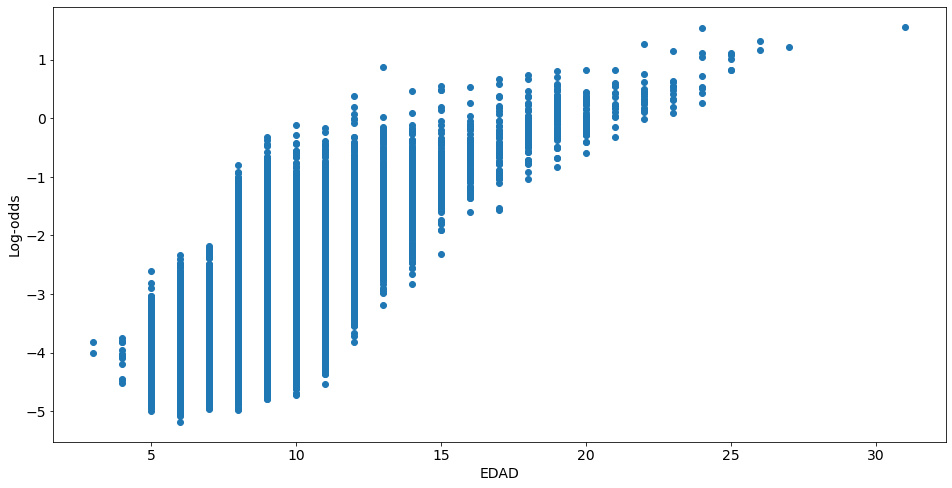

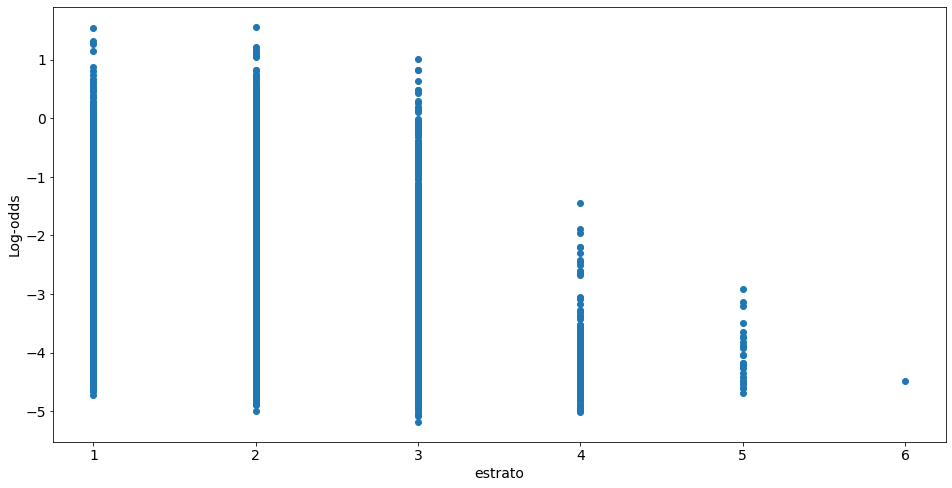

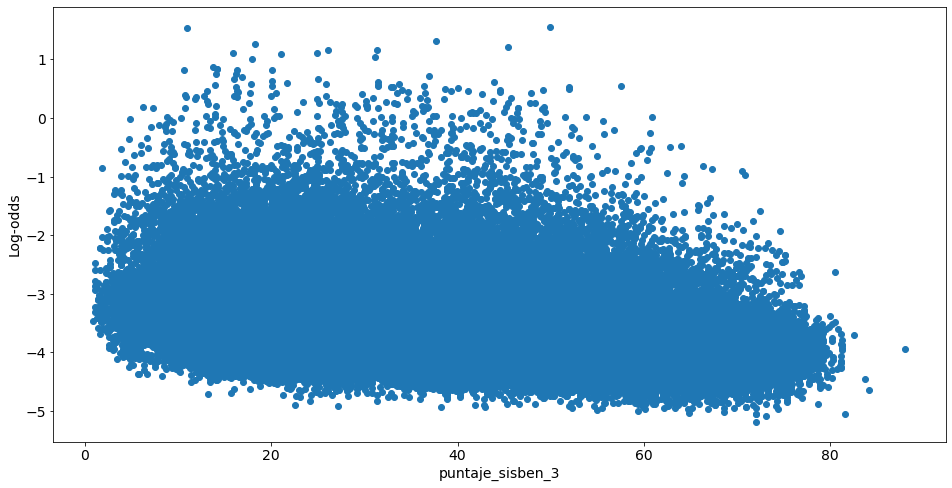

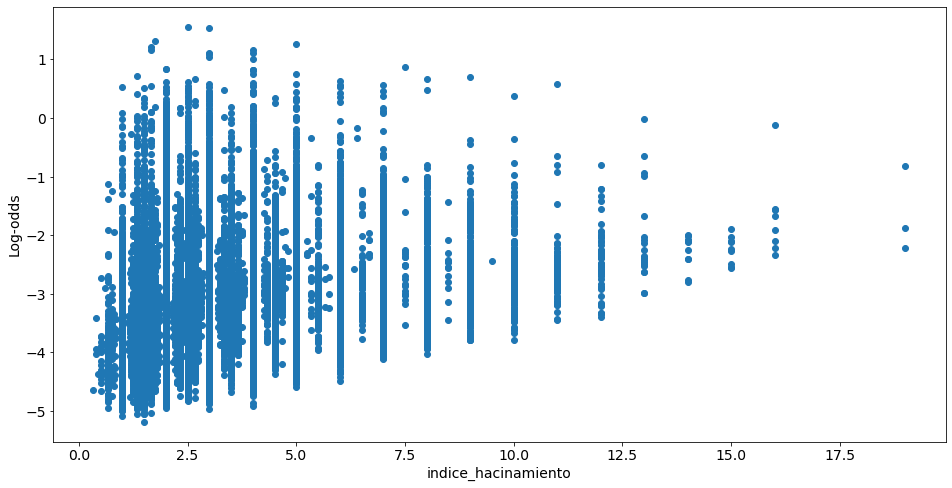

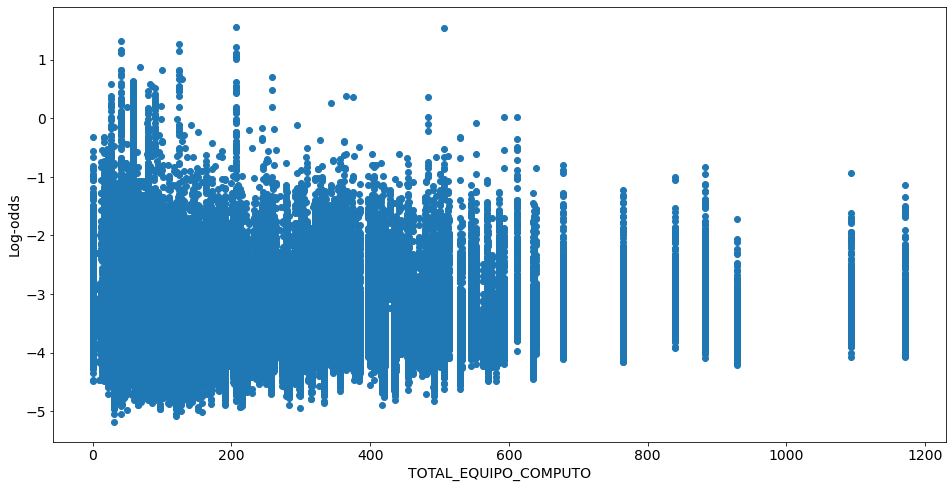

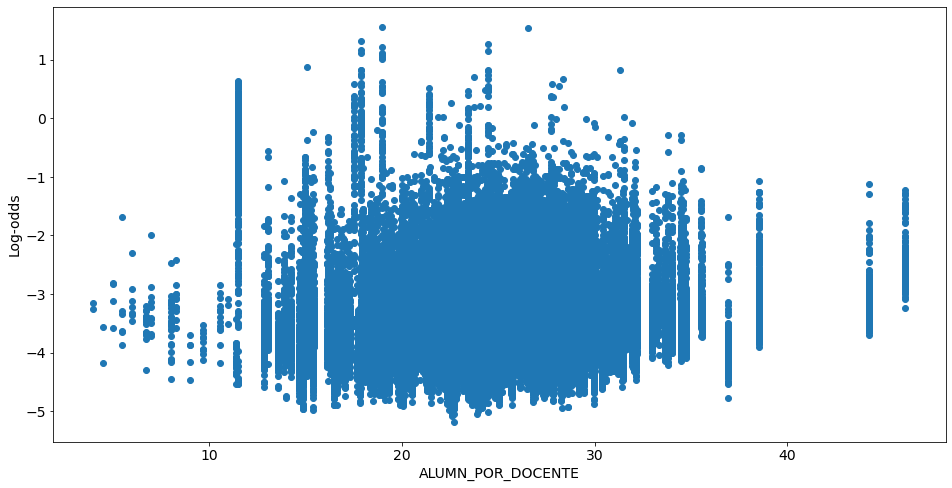

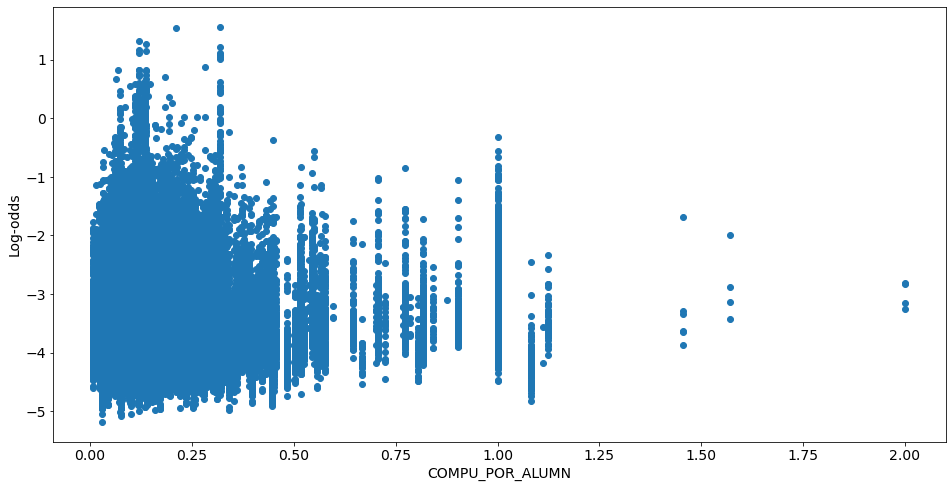

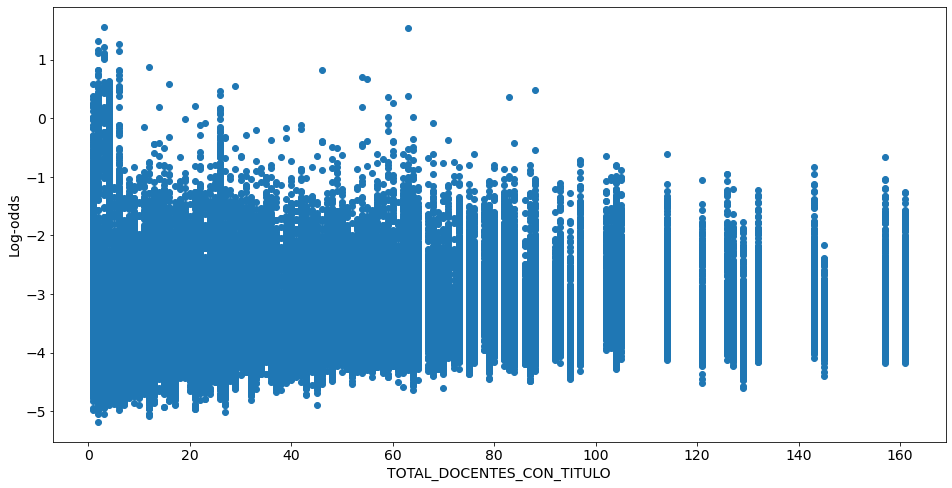

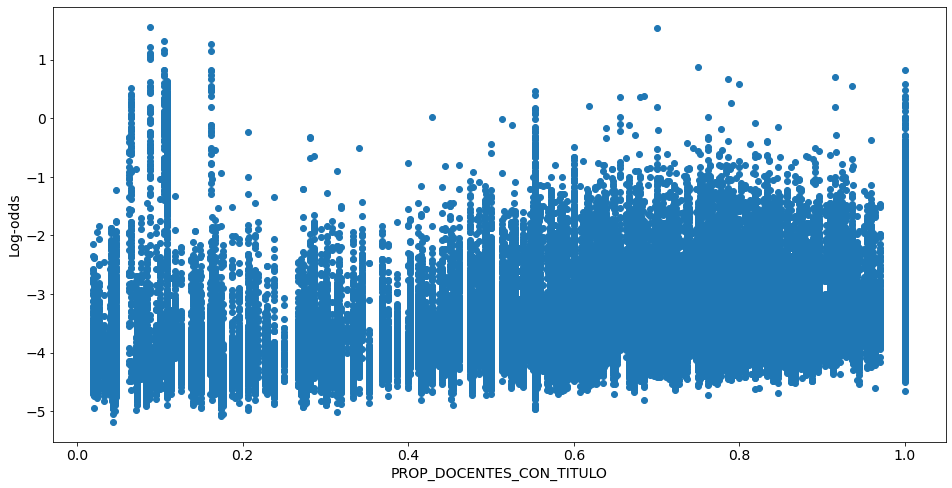

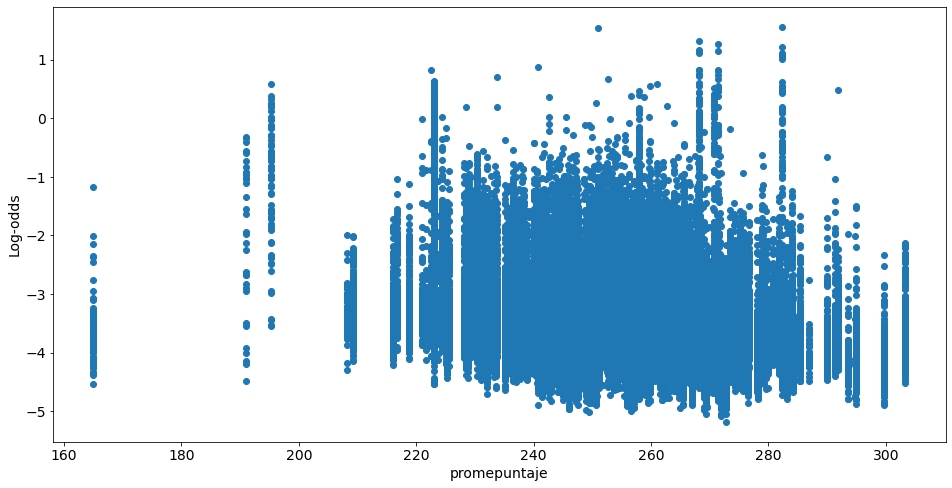

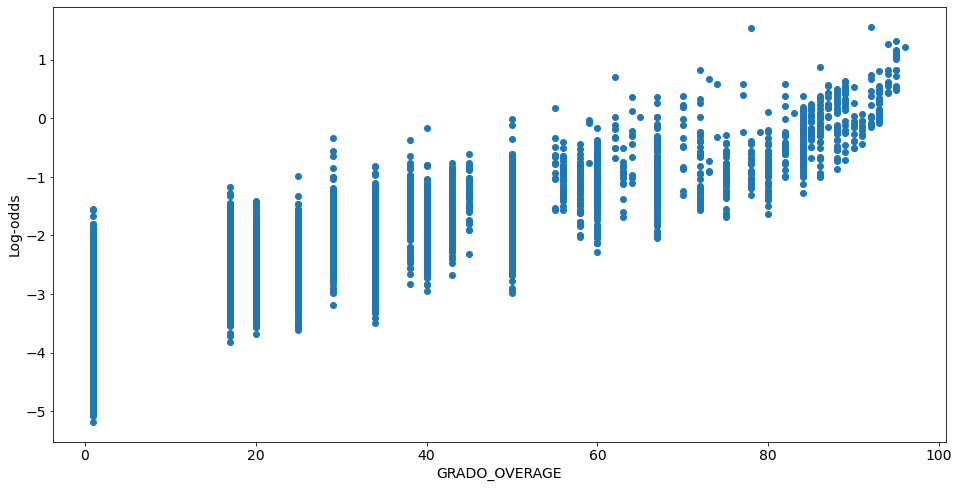

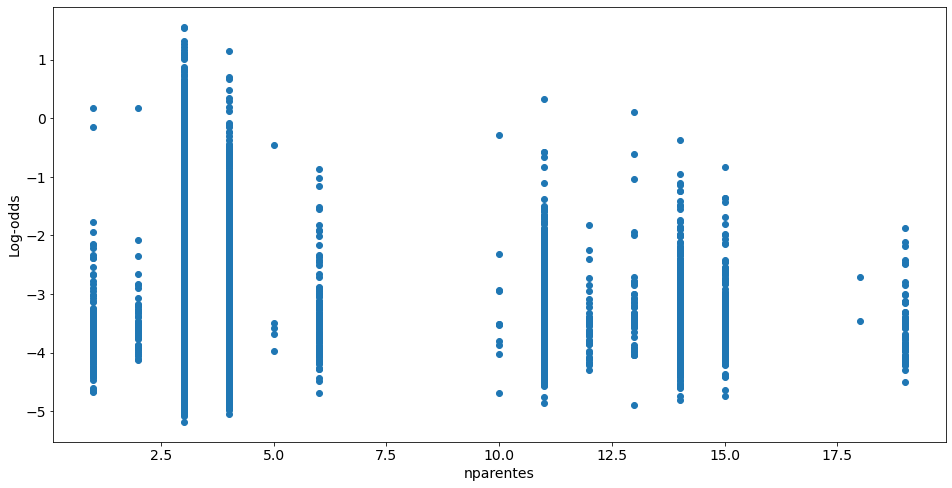

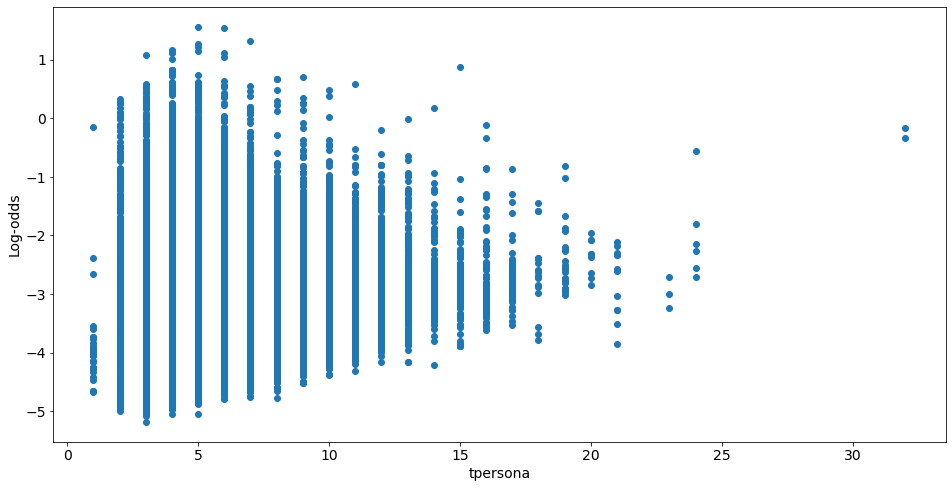

In [26]:
predicted = logit_results.predict(X_cons)

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

# Visualize predictor variable vs logit values for Age
for var in variables:
    plt.scatter(x=X_cons[var].values, y=log_odds)
    plt.xlabel(f"{var}")
    plt.ylabel("Log-odds")
    plt.show()
    

#### Box Tidwell with the added variables

In [27]:
y = df['REPITENTE']
X = df[variables]

# 0 and 1 are interchangable since in either case value*ln(value) = 0
X.replace({0: 1, 0.0 : 1.0}, inplace = True)


for var in variables:
    X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))

C:\Users\diego\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-27-7718e828fc32>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{var}:Log_{var}'] = X[var].apply(lambda x: x * np.log(x))


In [28]:
cols_to_keep = variables + X.columns.tolist()[-len(variables):]

In [29]:
X_cons = sm.add_constant(X, prepend=False)

In [30]:
## Should not print anything, otherwise an error will raise in the test
for col in X_cons:
    if np.isinf(X_cons[col]).values.sum() > 0:
        print(col)

In [31]:
## Should not print anything, otherwise an error will raise in the next cell
for col in X_cons:
    if np.isnan(X_cons[col]).values.sum() > 0:
        print(col, np.isnan(X_cons[col]).values.sum())

In [32]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                            GLM   Df Residuals:                   179067
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24686.
Date:                Thu, 07 Jul 2022   Deviance:                       49372.
Time:                        00:04:40   Pearson chi2:                 1.74e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================
                                                              coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------
EDAD                                                        2.8432      0.192     14.777      0.000       2.466       3.220
estrato                                                    -0.2958      0.168     -1.766      0.077      -0.624       0.033
puntaje_sisben_3                                            0.0370      0.015      2.470      0.014       0.008       0.066
indice_hacinamiento                                         0.0710      0.070      1.013      0.311      -0.066       0.208
TOTAL_EQUIPO_COMPUTO                                        0.0078      0.002      5.194      0.000       0.005       0.011
ALUMN_POR_DOCENTE                                           0.4737      0.102      4.660      0.000       0.274       0.673
COMPU_POR_ALUMN                                             0.3380      0.113      2.995      0.003       0.117       0.559
TOTAL_DOCENTES_CON_TITULO                                  -0.0190      0.005     -3.722      0.000      -0.029      -0.009
PROP_DOCENTES_CON_TITULO                                    1.2515      0.118     10.642      0.000       1.021       1.482
promepuntaje                                                0.7161      0.154      4.647      0.000       0.414       1.018
GRADO_OVERAGE                                               0.2661      0.009     28.620      0.000       0.248       0.284
nparentes                                                   0.2354      0.140      1.679      0.093      -0.039       0.510
tpersona                                                    0.1665      0.062      2.672      0.008       0.044       0.289
EDAD:Log_EDAD                                              -0.8569      0.060    -14.291      0.000      -0.974      -0.739
estrato:Log_estrato                                         0.0919      0.104      0.881      0.378      -0.113       0.296
puntaje_sisben_3:Log_puntaje_sisben_3                      -0.0093      0.003     -2.820      0.005      -0.016      -0.003
indice_hacinamiento:Log_indice_hacinamiento                -0.0083      0.029     -0.290      0.772      -0.064       0.048
TOTAL_EQUIPO_COMPUTO:Log_TOTAL_EQUIPO_COMPUTO              -0.0011      0.000     -5.236      0.000      -0.002      -0.001
ALUMN_POR_DOCENTE:Log_ALUMN_POR_DOCENTE                    -0.1114      0.024     -4.627      0.000      -0.159      -0.064
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN                         0.2823      0.298      0.946      0.344      -0.303       0.867
TOTAL_DOCENTES_CON_TITULO:Log_TOTAL_DOCENTES_CON_TITULO     0.0034      0.001      3.531      0.000       0.002       0.005
PROP_DOCENTES_CON_TITULO:Log_PROP_DOCENTES_CON_TITULO      -1.8998      0.223     -8.515      0.000      -2

In [33]:
logit_results.pvalues[logit_results.pvalues > 0.05]

estrato                                        0.077415
indice_hacinamiento                            0.310924
nparentes                                      0.093186
estrato:Log_estrato                            0.378339
indice_hacinamiento:Log_indice_hacinamiento    0.771585
COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN            0.344133
nparentes:Log_nparentes                        0.092251
dtype: float64

In [34]:
logit_results.pvalues[logit_results.pvalues > 0.05].index

Index(['estrato', 'indice_hacinamiento', 'nparentes', 'estrato:Log_estrato',
       'indice_hacinamiento:Log_indice_hacinamiento',
       'COMPU_POR_ALUMN:Log_COMPU_POR_ALUMN', 'nparentes:Log_nparentes'],
      dtype='object')

In [35]:
conti = []
for x in logit_results.pvalues[logit_results.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti.append(aux[0])
conti

['estrato', 'indice_hacinamiento', 'COMPU_POR_ALUMN', 'nparentes']

In [36]:
# We will set our new variables as conti after running the sme test with another numeric algorithm (Newton)
len(variables)-len(conti)

9

-------------------------

#### Comparasion against smf.logit

We can see that the results are equivalent

In [37]:
def formula_odds(dependiente, variables):
    formula = f'{dependiente} ~ '
    for variable in variables:
        if formula != f'{dependiente} ~ ':
            formula += ' + '
        formula += f'{variable}'
        formula += f' + {variable} : np.log({variable})'
    return formula  

In [38]:
formula = formula_odds('REPITENTE', variables)
formula

'REPITENTE ~ EDAD + EDAD : np.log(EDAD) + estrato + estrato : np.log(estrato) + puntaje_sisben_3 + puntaje_sisben_3 : np.log(puntaje_sisben_3) + indice_hacinamiento + indice_hacinamiento : np.log(indice_hacinamiento) + TOTAL_EQUIPO_COMPUTO + TOTAL_EQUIPO_COMPUTO : np.log(TOTAL_EQUIPO_COMPUTO) + ALUMN_POR_DOCENTE + ALUMN_POR_DOCENTE : np.log(ALUMN_POR_DOCENTE) + COMPU_POR_ALUMN + COMPU_POR_ALUMN : np.log(COMPU_POR_ALUMN) + TOTAL_DOCENTES_CON_TITULO + TOTAL_DOCENTES_CON_TITULO : np.log(TOTAL_DOCENTES_CON_TITULO) + PROP_DOCENTES_CON_TITULO + PROP_DOCENTES_CON_TITULO : np.log(PROP_DOCENTES_CON_TITULO) + promepuntaje + promepuntaje : np.log(promepuntaje) + GRADO_OVERAGE + GRADO_OVERAGE : np.log(GRADO_OVERAGE) + nparentes + nparentes : np.log(nparentes) + tpersona + tpersona : np.log(tpersona)'

In [39]:
X_cons = X_cons.iloc[:,0:len(variables)]

In [40]:
X_cons['REPITENTE'] = y

In [41]:
model= smf.logit(formula=formula, data= X_cons).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.137839
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                          Logit   Df Residuals:                   179067
Method:                           MLE   Df Model:                           26
Date:                Thu, 07 Jul 2022   Pseudo R-squ.:                 0.09065
Time:                        00:04:44   Log-Likelihood:                -24686.
converged:                       True   LL-Null:                       -27147.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================================================
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                     -44.6762      5.938     -7.524      0.000     -56.314     -33.038
EDAD                                                            2.8432      0.192     14.777      0.000       2.466       3.220
EDAD:np.log(EDAD)                                              -0.8569      0.060    -14.291      0.000      -0.974      -0.739
estrato                                                        -0.2958      0.168     -1.766      0.077      -0.624       0.033
estrato:np.log(estrato)                                         0.0919      0.104      0.881      0.378      -0.113       0.296
puntaje_sisben_3                                                0.0370      0.015      2.470      0.014       0.008       0.066
puntaje_sisben_3:np.log(puntaje_sisben_3)                      -0.0093      0.003     -2.820      0.005      -0.016      -0.003
indice_hacinamiento                                             0.0710      0.070      1.014      0.310      -0.066       0.208
indice_hacinamiento:np.log(indice_hacinamiento)                -0.0083      0.029     -0.291      0.771      -0.064       0.048
TOTAL_EQUIPO_COMPUTO                                            0.0078      0.002      5.194      0.000       0.005       0.011
TOTAL_EQUIPO_COMPUTO:np.log(TOTAL_EQUIPO_COMPUTO)              -0.0011      0.000     -5.236      0.000      -0.002      -0.001
ALUMN_POR_DOCENTE                                               0.4737      0.102      4.660      0.000       0.274       0.673
ALUMN_POR_DOCENTE:np.log(ALUMN_POR_DOCENTE)                    -0.1114      0.024     -4.627      0.000      -0.159      -0.064
COMPU_POR_ALUMN                                                 0.3380      0.113      2.995      0.003       0.117       0.559
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)                         0.2823      0.298      0.946      0.344      -0.303       0.867
TOTAL_DOCENTES_CON_TITULO                                      -0.0190      0.005     -3.722      0.000      -0.029      -0.009
TOTAL_DOCENTES_CON_TITULO:np.log(TOTAL_DOCENTES_CON_TITULO)     0.0034      0.001      3.531      0.000       0.002       0.005
PROP_DOCENTES_CON_TITULO                                        1.2515      0.118     10.642      0.000       1.021       1.482
PROP_DOCENTES_CON_TITULO:np.log(PROP_DOCENTES_CON_TITULO)      -1.8998      0.223     -8.515      0.000      -2.337      -1.463
promepuntaje                                                    0.7161      0.154      4.647      0.000       0.414       1.018
promepuntaje:np.log(promepuntaje)                              -0.1099      0.024     -4.653      0.000      -0.156      -0.064
GRADO_OVERAGE                                                   0.2661      0.009     28.619      0.000       0.248       0.284
GRADO_OVERAGE:np.log(GRADO_OVERAGE)      

In [42]:
model.pvalues[model.pvalues > 0.05]

estrato                                            0.077413
estrato:np.log(estrato)                            0.378334
indice_hacinamiento                                0.310411
indice_hacinamiento:np.log(indice_hacinamiento)    0.770737
COMPU_POR_ALUMN:np.log(COMPU_POR_ALUMN)            0.344130
nparentes                                          0.093172
nparentes:np.log(nparentes)                        0.092238
dtype: float64

In [43]:
conti2 = []
for x in model.pvalues[model.pvalues > 0.05].index:
    if ":" in x:
        aux = x.split(':')
        conti2.append(aux[0])
conti2

['estrato', 'indice_hacinamiento', 'COMPU_POR_ALUMN', 'nparentes']

In [44]:
# Should print empty set
set(conti)-set(conti2)

set()

-------------------------

#### Select CONT 1

In [45]:
# As we can see, both test give us the same results, so we decided to set variables = conti
# Select the continuous variables that fulfill the second assumption for the model
variables = conti

-------------------------

### Number III: Outliers 
For the purpose of detecting outliers we will use two methods. Based on the same [Reference](https://towardsdatascience.com/assumptions-of-logistic-regression-clearly-explained-44d85a22b290) as in the assumptions, we consider the Cooks distance and the rule of thumb of three std.

In [46]:
# Performing a comparative analysis is possible to see that running outliers detection
#with or without categorical data produces the same results. 
all_variables = variables + categorias
y = df['REPITENTE']
X = df[variables]
X_cons = sm.add_constant(X, prepend=False)

In [47]:
logit_results = sm.GLM(y, X_cons, family=sm.families.Binomial()).fit()
logit_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               179094
Model:                            GLM   Df Residuals:                   179089
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26991.
Date:                Thu, 07 Jul 2022   Deviance:                       53983.
Time:                        00:04:45   Pearson chi2:                 1.79e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
estrato                -0.1889      0.020     -9.261      0.000      -0.229      -0.149
indice_hacinamiento     0.1206      0.008     14.501      0.000       0.104       0.137
COMPU_POR_ALUMN         0.2659      0.116      2.297      0.022       0.039       0.493
nparentes               0.0038      0.011      0.348      0.728      -0.018       0.025
const                  -3.4040      0.064    -53.529      0.000      -3.529      -3.279
=======================================================================================
"""

In [48]:
# Get influence measures
influence = logit_results.get_influence()

In [49]:
# Obtain summary df of influence measures
summ_df = influence.summary_frame()
# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X)

In [50]:
# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

<ipython-input-50-915f4f9d121e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
<ipython-input-50-915f4f9d121e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))


In [51]:
# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

In [52]:
# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
39992,0.005555,4.672226
453512,0.004122,4.125437
217906,0.003591,6.551411
350148,0.003213,5.141853
75476,0.003161,4.948638


In [53]:
extreme.index

Int64Index([   333,    367,    399,    401,    418,    421,    481,   1036,
              1037,   1038,
            ...
            453431, 453438, 453507, 453512, 453871, 453897, 453915, 455346,
            455405, 455462],
           dtype='int64', length=6252)

In [54]:
df.index

Int64Index([   321,    322,    324,    326,    327,    328,    329,    332,
               333,    334,
            ...
            455465, 455467, 455468, 455469, 455471, 455474, 455476, 455477,
            455478, 455482],
           dtype='int64', length=179094)

In [55]:
df['REPITENTE'][df.index.isin(extreme.index)].value_counts()

1    6252
Name: REPITENTE, dtype: int64

In [56]:
index_rep = df['REPITENTE'][df['REPITENTE'] == 1].index

In [57]:
extreme.index.difference(index_rep)

Int64Index([], dtype='int64')

In [58]:
# Delete undesirable outliers that are NOT Positive REPITENTE
df = df.loc[~df.index.isin(extreme.index.difference(index_rep))]

In [59]:
df.index

Int64Index([   321,    322,    324,    326,    327,    328,    329,    332,
               333,    334,
            ...
            455465, 455467, 455468, 455469, 455471, 455474, 455476, 455477,
            455478, 455482],
           dtype='int64', length=179094)

---------------


## Number IV: Absence of Multicolinearility

 ### Continuous variables
 From the graph below it is clear that no continuous variable presents multilinearity with each other

<ipython-input-60-5d64253ecffd>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))


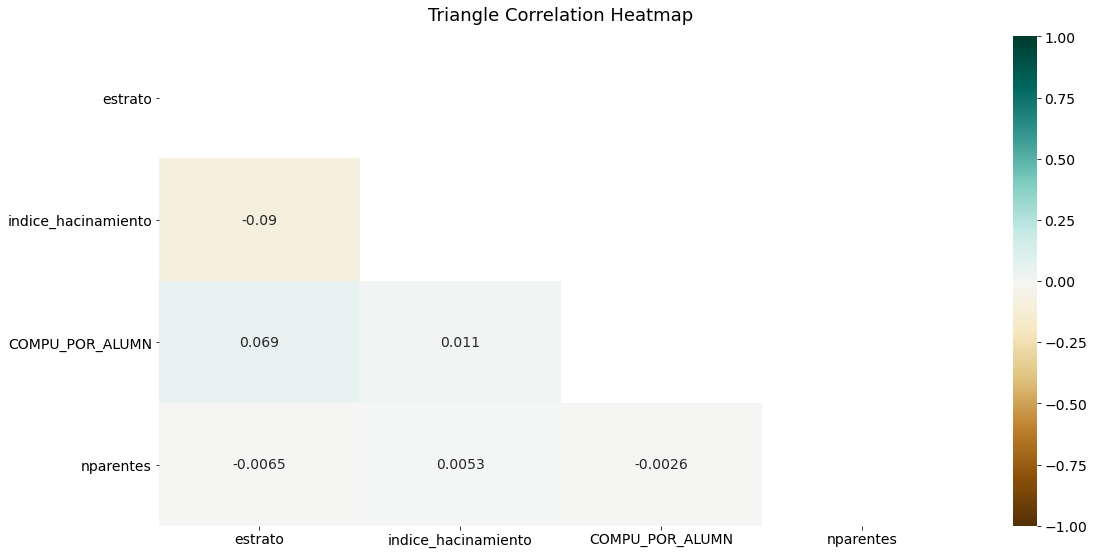

In [60]:
plt.figure(figsize=(18, 9))
# define the mask to set the values in the upper triangle to True

mask = np.triu(np.ones_like(df[variables].corr(), dtype=np.bool))
heatmap = sns.heatmap(df[variables].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Use variance inflation factor to identify any significant multi-collinearity
def calc_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df[variables])

,variables,VIF
0,estrato,6.293704
1,indice_hacinamiento,4.608127
2,COMPU_POR_ALUMN,3.086968
3,nparentes,6.155613


In [62]:
aux_multico = []
multi_df = calc_vif(df[variables])
for i in range(len(multi_df)):
    name = multi_df['variables'][i]
    value= multi_df['VIF'][i]
    if value >= 10: # The statndard rule to discard a variable is: VIF >10
        aux_multico.append(name)
variables = list(set(variables) - set(aux_multico))

In [63]:
variables

['COMPU_POR_ALUMN', 'indice_hacinamiento', 'nparentes', 'estrato']

## Number V: Independence of Observations for categorical Data (since continuous ones were treated already)
In this case the more appropiate thing to do is run a Chi-Squared test between all the categorical predictores and see which pairs are plausible.

In [64]:
def puntaje(x , categorias):
    pun= 0
    for i in categorias:
        crosstab = pd.crosstab(x, df[i])
        chi2, p, dof, ex = stats.chi2_contingency(crosstab)
        if p > 0.05:
            pun += 1
    return pun

In [65]:
independent = pd.DataFrame(columns = ['Category', 'counts'])
cats = categorias
counts = []
for j in categorias:
    counts.append(puntaje(df[j], categorias));
   
independent['Category'] = categorias
independent['counts'] = counts
independent = independent.sort_values(by = 'counts', ascending = False)
independent

,Category,counts
0,GENERO,7
2,PROVIENE_OTR_MUN,6
3,TIPO_DISCAPACIDAD,4
1,POB_VICT_CONF,3
8,computador,3
9,tiene_auto,3
10,ES_BILINGUE,3
6,todos_servicios_Pub,2
7,teneviv,1
4,CODIGO_JORNADA,0


In [66]:
independent['Below'] = independent['Category'].shift(-1)
independent

,Category,counts,Below
0,GENERO,7,PROVIENE_OTR_MUN
2,PROVIENE_OTR_MUN,6,TIPO_DISCAPACIDAD
3,TIPO_DISCAPACIDAD,4,POB_VICT_CONF
1,POB_VICT_CONF,3,computador
8,computador,3,tiene_auto
9,tiene_auto,3,ES_BILINGUE
10,ES_BILINGUE,3,todos_servicios_Pub
6,todos_servicios_Pub,2,teneviv
7,teneviv,1,CODIGO_JORNADA
4,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD


In [67]:
independent = independent.reset_index()

In [68]:
vals = []
for i in range(len(independent['Category'])-1):
    crosstab = pd.crosstab(df[independent['Category'][i]], df[independent['Below'][i]])
    chi2, p, dof, ex = stats.chi2_contingency(crosstab)
    vals.append(p)    

In [69]:
vals.append(1)

In [70]:
independent['p_values'] = vals

In [71]:
independent

,index,Category,counts,Below,p_values
0,0,GENERO,7,PROVIENE_OTR_MUN,8.080623e-01
1,2,PROVIENE_OTR_MUN,6,TIPO_DISCAPACIDAD,8.221317e-01
2,3,TIPO_DISCAPACIDAD,4,POB_VICT_CONF,6.642120e-01
3,1,POB_VICT_CONF,3,computador,2.464346e-31
4,8,computador,3,tiene_auto,0.000000e+00
5,9,tiene_auto,3,ES_BILINGUE,1.698559e-12
6,10,ES_BILINGUE,3,todos_servicios_Pub,4.271323e-18
7,6,todos_servicios_Pub,2,teneviv,0.000000e+00
8,7,teneviv,1,CODIGO_JORNADA,6.217640e-51
9,4,CODIGO_JORNADA,0,DIR_NUM_LOCALIDAD,0.000000e+00


In [72]:
cat_iid = []
for i in range(independent.shape[0]):
    cat_iid.append(independent['Category'][i])
    if independent['p_values'][i] <= 0.05:
        print(i)
        break

3


In [73]:
cat_iid

['GENERO', 'PROVIENE_OTR_MUN', 'TIPO_DISCAPACIDAD', 'POB_VICT_CONF']

#### These 3 lines are just a reminder of the variables taking into account

In [74]:
categorias = cat_iid

In [75]:
variables = conti

In [76]:
variables = list(set(variables) - set(aux_multico))

In [77]:
variables

['COMPU_POR_ALUMN', 'indice_hacinamiento', 'nparentes', 'estrato']

In [78]:
categorias

['GENERO', 'PROVIENE_OTR_MUN', 'TIPO_DISCAPACIDAD', 'POB_VICT_CONF']

------------------

# Run Models

In [79]:
# def formula_maker(dependiente, variables, categorias):
#     formula = f'{dependiente} ~ '
#     for variable in variables:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'{variable}'
#     for categoria in categorias:
#         if formula != f'{dependiente} ~ ':
#             formula += ' + '
#         formula += f'C({categoria})'
#     return formula  

In [80]:
# formula

In [81]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit() # Add if method='bfgs' if singular Matrix appears
# model.summary()

In [82]:
# formula=formula_maker('REPITENTE', variables, categorias)
# model= smf.logit(formula= formula, data= df).fit(method = 'bfgs') # Add if method='bfgs' if singular Matrix appears
# model.summary()

## Model with selected variables

In [83]:
all_vars = variables + categorias
y1 = df['REPITENTE']
X1 = df[all_vars]

X_cons1 = sm.add_constant(X1, prepend=False)
X_cons1 = pd.get_dummies(X_cons1, columns=categorias, drop_first=True)
X_cons1.head(2)

,COMPU_POR_ALUMN,indice_hacinamiento,nparentes,estrato,const,GENERO_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,POB_VICT_CONF_1
321,0.524904,1.000000,3,3,1.0,0,0,0,0
322,0.524904,1.333008,3,3,1.0,0,0,0,0


In [84]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_cons1, y1, test_size=0.3)

In [85]:
model_1 = sm.GLM(y_train1, X_train1, family=sm.families.Binomial()).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               125365
Model:                            GLM   Df Residuals:                   125356
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18719.
Date:                Thu, 07 Jul 2022   Deviance:                       37438.
Time:                        00:04:53   Pearson chi2:                 1.25e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
COMPU_POR_ALUMN         0.1760      0.140      1.257      0.209      -0.098       0.450
indice_hacinamiento     0.1165      0.010     11.639      0.000       0.097       0.136
nparentes              -0.0044      0.014     -0.323      0.747      -0.031       0.022
estrato                -0.1891      0.024     -7.728      0.000      -0.237      -0.141
const                  -3.6269      0.080    -45.429      0.000      -3.783      -3.470
GENERO_1                0.4115      0.032     12.972      0.000       0.349       0.474
PROVIENE_OTR_MUN_1      0.1780      0.150      1.184      0.236      -0.117       0.472
TIPO_DISCAPACIDAD_1     0.5806      0.065      8.989      0.000       0.454       0.707
POB_VICT_CONF_1         0.3652      0.076      4.782      0.000       0.216       0.515
=======================================================================================
"""

### Threshold selection

[Reference](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

In [86]:
y_probs1 = model_1.predict(X_test1)

fpr, tpr, thresholds = roc_curve(y_test1, y_probs1)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.035088, G-Mean=0.576


In [87]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [88]:
y_predict1 = y_probs1.apply(classi)

In [89]:
y_predict1.value_counts()

0    31526
1    22203
dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test1, y_predict1)
print(confusion_matrix)

[[30694 21144]
 [  832  1059]]


<AxesSubplot:>

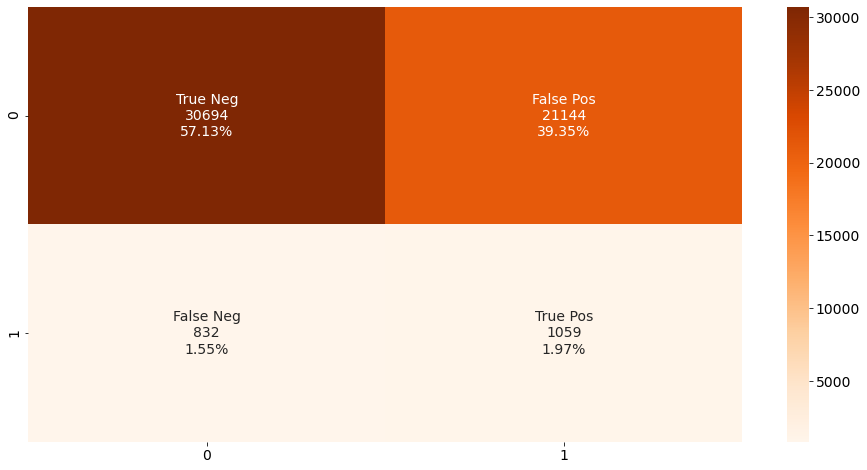

In [91]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.97      0.59      0.74     51838
           1       0.05      0.56      0.09      1891

    accuracy                           0.59     53729
   macro avg       0.51      0.58      0.41     53729
weighted avg       0.94      0.59      0.71     53729



## Model with weights

In [93]:
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [94]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [95]:
all_vars = variables + categorias
y2 = df['REPITENTE']
X2 = df[all_vars]

X_cons2 = sm.add_constant(X2, prepend=False)
X_cons2 = pd.get_dummies(X_cons2, columns=categorias, drop_first=True)
X_cons2.head(2)

,COMPU_POR_ALUMN,indice_hacinamiento,nparentes,estrato,const,GENERO_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,POB_VICT_CONF_1
321,0.524904,1.000000,3,3,1.0,0,0,0,0
322,0.524904,1.333008,3,3,1.0,0,0,0,0


In [96]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_cons2, y2, test_size=0.3)

In [97]:
pesos = y_train2.apply(pesos)

In [98]:
modelo_pesos = sm.GLM(y_train2, X_train2, family=sm.families.Binomial(), freq_weights=pesos).fit()
modelo_pesos.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               125365
Model:                            GLM   Df Residuals:                  8403.71
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5705.8
Date:                Thu, 07 Jul 2022   Deviance:                       11412.
Time:                        00:04:54   Pearson chi2:                 8.42e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
COMPU_POR_ALUMN         0.3212      0.205      1.564      0.118      -0.081       0.724
indice_hacinamiento     0.1320      0.016      8.422      0.000       0.101       0.163
nparentes               0.0095      0.019      0.496      0.620      -0.028       0.047
estrato                -0.1766      0.035     -5.060      0.000      -0.245      -0.108
const                  -0.4758      0.116     -4.118      0.000      -0.702      -0.249
GENERO_1                0.4312      0.045      9.639      0.000       0.343       0.519
PROVIENE_OTR_MUN_1      0.2815      0.222      1.267      0.205      -0.154       0.717
TIPO_DISCAPACIDAD_1     0.6237      0.107      5.836      0.000       0.414       0.833
POB_VICT_CONF_1         0.4027      0.122      3.298      0.001       0.163       0.642
=======================================================================================
"""

In [99]:
y_probs2 = modelo_pesos.predict(X_test2)

fpr, tpr, thresholds = roc_curve(y_test2, y_probs2)
gmeans = np.sqrt(tpr * (1-fpr))

ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]


Best Threshold=0.491722, G-Mean=0.572


In [100]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [101]:
y_predict2 = y_probs2.apply(classi)

In [102]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test2, y_predict2)
print(confusion_matrix)

[[29295 22506]
 [  812  1116]]


<AxesSubplot:>

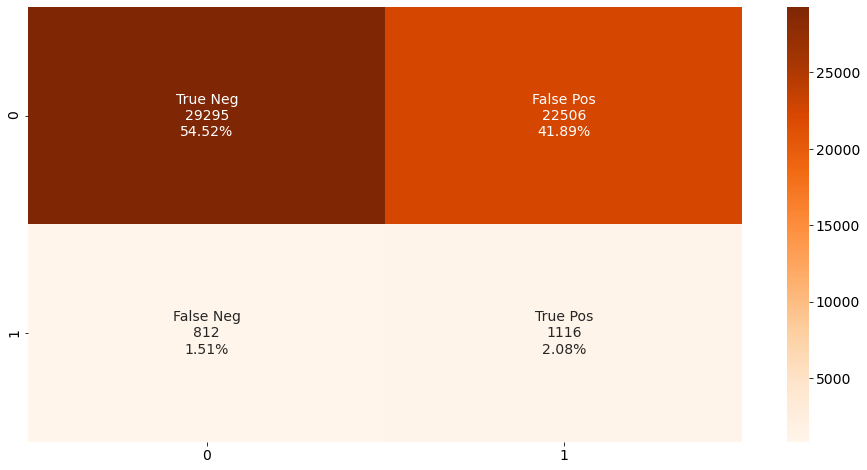

In [103]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test2, y_predict2))

              precision    recall  f1-score   support

           0       0.97      0.57      0.72     51801
           1       0.05      0.58      0.09      1928

    accuracy                           0.57     53729
   macro avg       0.51      0.57      0.40     53729
weighted avg       0.94      0.57      0.69     53729



## Model with balanced dataset

In [105]:
df_repitentes = df[df['REPITENTE'] == 1]
df_no_repitentes = df[df['REPITENTE'] == 0].sample(n=df_repitentes.shape[0], random_state=145)
df_consolidado_frac = pd.concat([df_no_repitentes, df_repitentes])

In [106]:
all_vars = variables + categorias
y = df_consolidado_frac['REPITENTE']
X = df_consolidado_frac[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,COMPU_POR_ALUMN,indice_hacinamiento,nparentes,estrato,const,GENERO_1,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,POB_VICT_CONF_1
362292,0.148620,3.0,3,2,1.0,0,0,0,0
295639,0.078995,6.0,3,2,1.0,1,0,0,0


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cons, y, test_size=0.3)

In [108]:
y_train.value_counts()

0    4406
1    4359
Name: REPITENTE, dtype: int64

In [109]:
modelo_balanceado = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
modelo_balanceado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:                 8765
Model:                            GLM   Df Residuals:                     8756
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5949.8
Date:                Thu, 07 Jul 2022   Deviance:                       11900.
Time:                        00:04:55   Pearson chi2:                 8.77e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
COMPU_POR_ALUMN         0.3368      0.202      1.665      0.096      -0.060       0.733
indice_hacinamiento     0.1292      0.015      8.447      0.000       0.099       0.159
nparentes               0.0334      0.020      1.683      0.092      -0.006       0.072
estrato                -0.1785      0.034     -5.206      0.000      -0.246      -0.111
const                  -0.5255      0.114     -4.597      0.000      -0.750      -0.301
GENERO_1                0.3986      0.044      9.095      0.000       0.313       0.485
PROVIENE_OTR_MUN_1      0.4372      0.226      1.931      0.054      -0.007       0.881
TIPO_DISCAPACIDAD_1     0.6369      0.106      5.992      0.000       0.429       0.845
POB_VICT_CONF_1         0.4022      0.122      3.301      0.001       0.163       0.641
=======================================================================================
"""

In [110]:
y_probs = modelo_balanceado.predict(X_test)

# Calculates different FPR and TPR
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Take geometric mean as criteria for determining Threeshold
gmeans = np.sqrt(tpr * (1-fpr))

# Get maximun value
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Set the threshold
umbral = thresholds[ix]

Best Threshold=0.494018, G-Mean=0.576


In [111]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [112]:
y_predict = y_probs.apply(classi)

In [113]:
# Interesting graphs to explore
# sns.scatterplot(X_test['indice_hacinamiento'], y_probs)

In [114]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print(confusion_matrix)

[[1079  776]
 [ 820 1082]]


<AxesSubplot:>

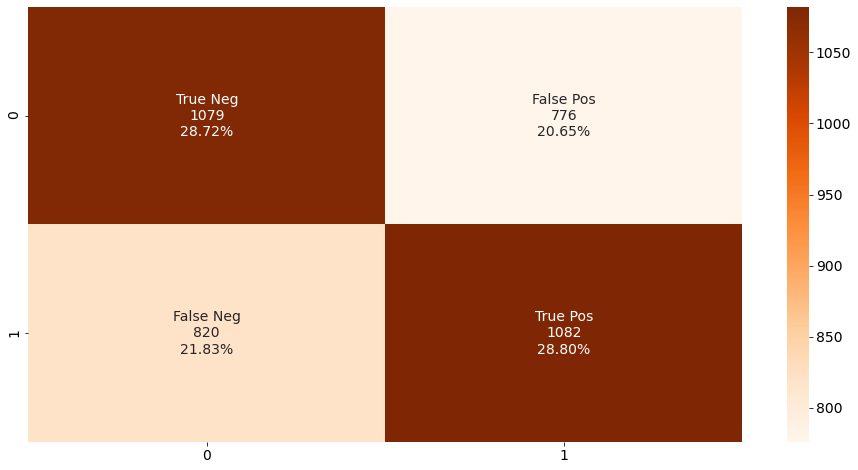

In [115]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [116]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1855
           1       0.58      0.57      0.58      1902

    accuracy                           0.58      3757
   macro avg       0.58      0.58      0.58      3757
weighted avg       0.58      0.58      0.58      3757



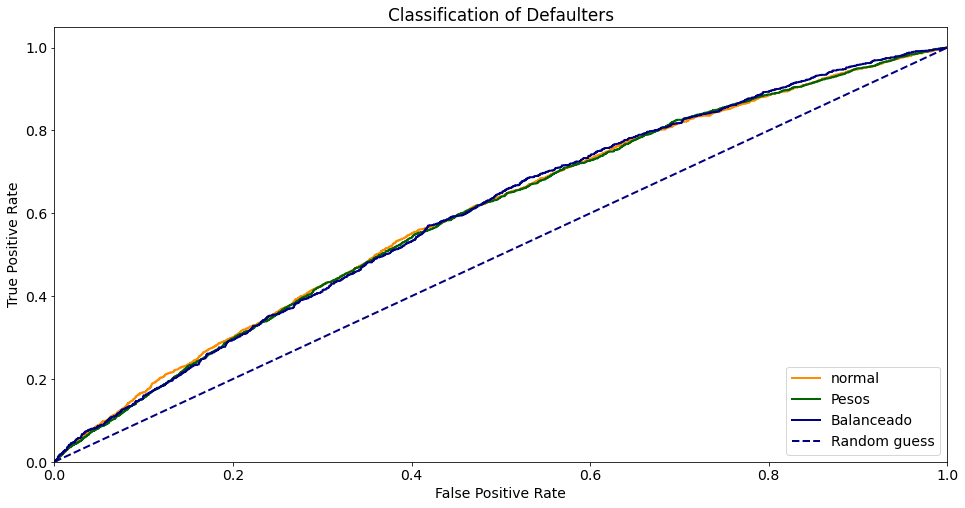

In [117]:
predict_p = model_1.predict(X_test1)
predict_2_p = modelo_pesos.predict(X_test2)
predict_3_p = modelo_balanceado.predict(X_test)

roc_p = roc_curve(y_test1, predict_p)
roc_2_p = roc_curve(y_test2, predict_2_p)
roc_3_p = roc_curve(y_test, predict_3_p)

plt.figure()
line_width = 2
plt.plot(roc_p[0], roc_p[1], color='darkorange',
         lw=line_width, label=f'normal')
plt.plot(roc_2_p[0], roc_2_p[1], color='darkgreen',
         lw=line_width, label=f'Pesos')
plt.plot(roc_3_p[0], roc_3_p[1], color='navy',
         lw=line_width, label=f'Balanceado')

plt.plot([0, 1], [0, 1], color='navy', lw=line_width, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification of Defaulters')
plt.legend(loc='lower right')
plt.show()

In [118]:

auc_p = auc( roc_p[0], roc_p[1] )
auc_2_p = auc( roc_2_p[0], roc_2_p[1] )
auc_3_p = auc(roc_3_p[0], roc_3_p[1])

print('AUC of Normal: ', auc_p)
print('AUC of the model pesos ', auc_2_p)
print('AUC of the model balanceado ', auc_3_p)

AUC of Normal:  0.5977344166361016
AUC of the model pesos  0.5950299666590328
AUC of the model balanceado  0.5979082877719863


## Model selection based on AUC scores

**Select the model with biggest AUC score**



In [119]:
AUC_scores =[auc_p, auc_2_p, auc_3_p]

In [120]:
indice_max_models = np.argmax(AUC_scores)

In [121]:
if indice_max_models == 0:
    print('Best model is Regresion Logistica Simple')
elif indice_max_models == 1:
    print('Best model is Regresion Logistica con Pesos')
else:
    print('Best model is Regresion Logistica Balanceada')

Best model is Regresion Logistica Balanceada


**Below we can see the variables that were take into account when running the previous models**

In [122]:
variables

['COMPU_POR_ALUMN', 'indice_hacinamiento', 'nparentes', 'estrato']

In [123]:
categorias

['GENERO', 'PROVIENE_OTR_MUN', 'TIPO_DISCAPACIDAD', 'POB_VICT_CONF']

-------------------------------------

# Dash tables

In [124]:
indice_max_models

2

In [125]:
def aux_is_m(n):
    if n-1 == indice_max_models:
        val = 'Si'
    else:
        val = 'No'
    return val

In [133]:
tab1 =  model_1.params.to_frame().reset_index()
tab2 = modelo_pesos.params.to_frame().reset_index()
tab3 = modelo_balanceado.params.to_frame().reset_index()

tab = pd.concat([tab1,tab2,tab3], axis = 0)
tab = tab.reset_index()
tab.drop('level_0', inplace = True, axis = 1)
tab.rename(columns = {'index': 'variable'}, inplace = True)
tab.rename(columns = {0: 'coeff'}, inplace = True)

p1 = model_1.pvalues.to_frame().reset_index()
p2 = modelo_pesos.pvalues.to_frame().reset_index()
p3 = modelo_balanceado.pvalues.to_frame().reset_index()

pvals = pd.concat([p1,p2,p3], axis = 0)
pvals = pvals.reset_index()

pvals.drop('level_0', inplace = True, axis = 1)
pvals.drop('index', inplace = True, axis = 1)
pvals.rename(columns = {0: 'significative'}, inplace = True)
tab = pd.concat([tab,pvals], axis = 1)


tab['Anno'] = 2020
tab['nivel'] = 'Primaria'

m1 = ['Regresion Logistica Simple']*tab1.shape[0]
m1 = pd.Series(m1)

m2 = ['Regresión Logistica con Pesos']*tab2.shape[0]
m2 =  pd.Series(m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

m3 = ['Regresión Logistica Balanceada']*tab3.shape[0]
m3 = pd.Series(m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

m = pd.concat([m1,m2,m3], axis = 0)

tab['model'] = m

is_m1 =[aux_is_m(1)]*tab1.shape[0]
is_m1 = pd.Series(is_m1)

is_m2 = [aux_is_m(2)]*tab2.shape[0]
is_m2 =  pd.Series(is_m2 , index = [i for i in range(tab1.shape[0] , tab1.shape[0]+tab2.shape[0] )])

is_m3 = [aux_is_m(3)]*tab3.shape[0]
is_m3 = pd.Series(is_m3 , index = [i for i in range(tab1.shape[0] + tab2.shape[0], tab1.shape[0]+tab2.shape[0] + tab3.shape[0])])

is_m = pd.concat([is_m1,is_m2,is_m3], axis = 0)
tab['is_final_model'] = is_m
tab


,variable,coeff,significative,Anno,nivel,model,is_final_model
0,COMPU_POR_ALUMN,0.175952,2.086854e-01,2020,Primaria,Regresion Logistica Simple,No
1,indice_hacinamiento,0.116495,2.596646e-31,2020,Primaria,Regresion Logistica Simple,No
2,nparentes,-0.004397,7.468490e-01,2020,Primaria,Regresion Logistica Simple,No
3,estrato,-0.189149,1.091977e-14,2020,Primaria,Regresion Logistica Simple,No
4,const,-3.626865,0.000000e+00,2020,Primaria,Regresion Logistica Simple,No
5,GENERO_1,0.411455,1.771372e-38,2020,Primaria,Regresion Logistica Simple,No
6,PROVIENE_OTR_MUN_1,0.177952,2.362324e-01,2020,Primaria,Regresion Logistica Simple,No
7,TIPO_DISCAPACIDAD_1,0.580650,2.486649e-19,2020,Primaria,Regresion Logistica Simple,No
8,POB_VICT_CONF_1,0.365231,1.736539e-06,2020,Primaria,Regresion Logistica Simple,No
9,COMPU_POR_ALUMN,0.321249,1.177600e-01,2020,Primaria,Regresión Logistica con Pesos,No


In [134]:
def aux_sig(x):
    if x < 0.05:
        val = 'Si'
    else:
        val = 'No'
    return val

In [135]:
tab['significative'] = tab['significative'].apply(aux_sig )

In [136]:
tab

,variable,coeff,significative,Anno,nivel,model,is_final_model
0,COMPU_POR_ALUMN,0.175952,No,2020,Primaria,Regresion Logistica Simple,No
1,indice_hacinamiento,0.116495,Si,2020,Primaria,Regresion Logistica Simple,No
2,nparentes,-0.004397,No,2020,Primaria,Regresion Logistica Simple,No
3,estrato,-0.189149,Si,2020,Primaria,Regresion Logistica Simple,No
4,const,-3.626865,Si,2020,Primaria,Regresion Logistica Simple,No
5,GENERO_1,0.411455,Si,2020,Primaria,Regresion Logistica Simple,No
6,PROVIENE_OTR_MUN_1,0.177952,No,2020,Primaria,Regresion Logistica Simple,No
7,TIPO_DISCAPACIDAD_1,0.580650,Si,2020,Primaria,Regresion Logistica Simple,No
8,POB_VICT_CONF_1,0.365231,Si,2020,Primaria,Regresion Logistica Simple,No
9,COMPU_POR_ALUMN,0.321249,No,2020,Primaria,Regresión Logistica con Pesos,No


In [138]:
tab.to_csv('../data/3-oro/t20p.csv')

In [130]:
# Modelo con pesos
modelo_pesos.params.to_frame().reset_index()

,index,0
0,COMPU_POR_ALUMN,0.321249
1,indice_hacinamiento,0.132004
2,nparentes,0.009503
3,estrato,-0.176578
4,const,-0.475806
5,GENERO_1,0.431161
6,PROVIENE_OTR_MUN_1,0.281483
7,TIPO_DISCAPACIDAD_1,0.623651
8,POB_VICT_CONF_1,0.402722


In [131]:
# Modelo Balanceado
modelo_balanceado.params.to_frame().reset_index()

,index,0
0,COMPU_POR_ALUMN,0.336760
1,indice_hacinamiento,0.129158
2,nparentes,0.033394
3,estrato,-0.178531
4,const,-0.525548
5,GENERO_1,0.398647
6,PROVIENE_OTR_MUN_1,0.437155
7,TIPO_DISCAPACIDAD_1,0.636897
8,POB_VICT_CONF_1,0.402183


In [132]:
dict_fallo = {'f':0 'f'}

SyntaxError: invalid syntax (<ipython-input-132-c62b09edfb16>, line 1)

-----------------------------

# Models with all variables

### Model with all variables + Constant

In [14]:
variables = ['EDAD',
             'estrato',
             'puntaje_sisben_3',
             'indice_hacinamiento', #-> solo si no se pone nivel_hacinamiento en Categoria
             'TOTAL_EQUIPO_COMPUTO',
             'ALUMN_POR_DOCENTE',
             'COMPU_POR_ALUMN',
             'TOTAL_DOCENTES_CON_TITULO',
             'PROP_DOCENTES_CON_TITULO', #-> solo si no se incluye TOTAL_DOCENTES_CON_TITULO y TOTAL_ALUM al tiempo
             'promepuntaje',
             'GRADO_OVERAGE',
             #'TOTAL_DOCENTES',
             #'TOTAL_ALUMNOS',
             'nparentes',
             #'tcuartosvi',
             'tpersona'
            ]

categorias= ['GENERO',
             'POB_VICT_CONF',
             'PROVIENE_OTR_MUN',
             'TIPO_DISCAPACIDAD',
             'CODIGO_ETNIA',
             'CODIGO_JORNADA',
             'DIR_NUM_LOCALIDAD',
             'embaraza',
             'todos_servicios_Pub',
             'teneviv',
             'computador',
             'tiene_auto',
             'ES_BILINGUE',
             'CAP_EXC',
             

             ]

In [15]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_2,POB_VICT_CONF_3,POB_VICT_CONF_4,POB_VICT_CONF_6,POB_VICT_CONF_7,POB_VICT_CONF_9,POB_VICT_CONF_10,POB_VICT_CONF_12,POB_VICT_CONF_13,POB_VICT_CONF_15,POB_VICT_CONF_17,POB_VICT_CONF_18,POB_VICT_CONF_20,POB_VICT_CONF_99,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9,CAP_EXC_10,CAP_EXC_11
321,10,3,55.91,1.000000,137,21.75,0.524904,7,0.583333,262.909091,100,3,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
322,10,3,38.23,1.333008,137,21.75,0.524904,7,0.583333,262.909091,100,3,4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [16]:
from sklearn.model_selection import train_test_split
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_cons, y, test_size=0.3)

In [17]:
model_all = sm.GLM(y_train_all, X_train_all, family=sm.families.Binomial()).fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               125365
Model:                            GLM   Df Residuals:                   125290
Model Family:                Binomial   Df Model:                           74
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17301.
Date:                Thu, 07 Jul 2022   Deviance:                       34602.
Time:                        15:44:33   Pearson chi2:                 1.23e+05
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1312      0.009     14.085      0.000       0.113       0.149
estrato                      -0.0718      0.030     -2.364      0.018      -0.131      -0.012
puntaje_sisben_3             -0.0043      0.001     -3.787      0.000      -0.007      -0.002
indice_hacinamiento           0.0482      0.013      3.766      0.000       0.023       0.073
TOTAL_EQUIPO_COMPUTO         -0.0003      0.000     -2.049      0.041      -0.001   -1.38e-05
ALUMN_POR_DOCENTE             0.0038      0.005      0.803      0.422      -0.006       0.013
COMPU_POR_ALUMN               1.4627      0.235      6.221      0.000       1.002       1.923
TOTAL_DOCENTES_CON_TITULO     0.0022      0.001      2.678      0.007       0.001       0.004
PROP_DOCENTES_CON_TITULO      0.3101      0.081      3.843      0.000       0.152       0.468
promepuntaje                  0.0058      0.001      4.247      0.000       0.003       0.009
GRADO_OVERAGE                -0.0440      0.001    -33.570      0.000      -0.047      -0.041
nparentes                    -0.0024      0.014     -0.173      0.862      -0.029       0.024
tpersona                      0.0446      0.009      5.120      0.000       0.028       0.062
const                       -25.1206   1.74e+04     -0.001      0.999   -3.42e+04    3.42e+04
GENERO_1                      0.3275      0.033     10.062      0.000       0.264       0.391
POB_VICT_CONF_2               0.2710      1.053      0.257      0.797      -1.794       2.336
POB_VICT_CONF_3               0.7426      0.435      1.708      0.088      -0.109       1.595
POB_VICT_CONF_4              -0.5524      1.014     -0.545      0.586      -2.539       1.435
POB_VICT_CONF_6             -22.8934   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
POB_VICT_CONF_7             -22.2623   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
POB_VICT_CONF_9             -22.0050    4.3e+04     -0.001      1.000   -8.43e+04    8.42e+04
POB_VICT_CONF_10             -0.4667      0.613     -0.762      0.446      -1.668       0.734
POB_VICT_CONF_12            -22.5395   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
POB_VICT_CONF_13            -22.5656   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
POB_VICT_CONF_15           7.909e-09      0.000   3.11e-05      1.000      -0.000       0.000
POB_VICT_CONF_17            -22.0020   1.04e+05     -0.000      1.000   -2.04e+05    2.04e+05
POB_VICT_CONF_18            -23.0347   9.58e+04     -0.000      1.000   -1.88e+05    1.88e+05
POB_VICT_CONF_20            -22.1165   1.51e+05     -0.000      1.000   -2.95e+05    2.95e+05
POB_VICT_CONF_99             -0.1690      0.083     -2.046      0.041      -0.331      -0.007
PROVIENE_OTR_MUN_1            0.2307      0.143      1.618      0.106      

In [18]:
# Gets probabilities
y_probs_all = model_all.predict(X_test_all)

# Get TPR = True positive rate, FPR = False positive Rate and values to compare based on ROC_curves 
fpr, tpr, thresholds = roc_curve(y_test_all, y_probs_all)

# We establish Gmean maximun as criteria for optimazing tradeoff between errors of classification
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)


print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.033576, G-Mean=0.652


In [19]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [20]:
# We make our predictions based on theorical threshold
y_predict_all = y_probs_all.apply(classi)

In [21]:
# Get confusion matrix = Crosstab table of classifications
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_all, y_predict_all)
print(confusion_matrix)

[[35641 16153]
 [  741  1194]]


<AxesSubplot:>

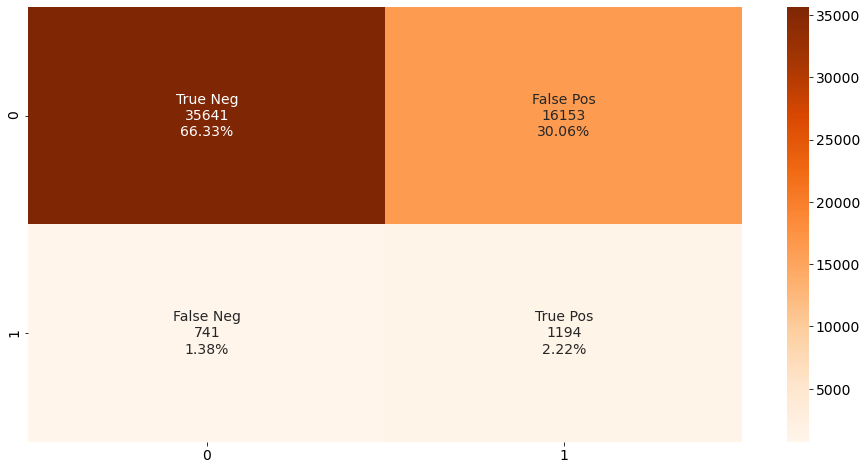

In [22]:
# Auxiliar Graph
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [23]:
# Final report
from sklearn.metrics import classification_report
print(classification_report(y_test_all, y_predict_all))

              precision    recall  f1-score   support

           0       0.98      0.69      0.81     51794
           1       0.07      0.62      0.12      1935

    accuracy                           0.69     53729
   macro avg       0.52      0.65      0.47     53729
weighted avg       0.95      0.69      0.78     53729



----------------------------

### Model with all variables with weights

In [24]:
# We set the value for weights accordingly to distribution of our data
w = (df['REPITENTE'].value_counts()/ df.shape[0])[0]

In [25]:
def pesos(x):
    if x == 1:
        peso = w
    else:
        peso = 1-w
    return peso

In [26]:
all_vars = variables + categorias
y = df['REPITENTE']
X = df[all_vars]

X_cons = sm.add_constant(X, prepend=False)
X_cons = pd.get_dummies(X_cons, columns=categorias, drop_first=True)
X_cons.head(2)

,EDAD,estrato,puntaje_sisben_3,indice_hacinamiento,TOTAL_EQUIPO_COMPUTO,ALUMN_POR_DOCENTE,COMPU_POR_ALUMN,TOTAL_DOCENTES_CON_TITULO,PROP_DOCENTES_CON_TITULO,promepuntaje,GRADO_OVERAGE,nparentes,tpersona,const,GENERO_1,POB_VICT_CONF_2,POB_VICT_CONF_3,POB_VICT_CONF_4,POB_VICT_CONF_6,POB_VICT_CONF_7,POB_VICT_CONF_9,POB_VICT_CONF_10,POB_VICT_CONF_12,POB_VICT_CONF_13,POB_VICT_CONF_15,POB_VICT_CONF_17,POB_VICT_CONF_18,POB_VICT_CONF_20,POB_VICT_CONF_99,PROVIENE_OTR_MUN_1,TIPO_DISCAPACIDAD_1,CODIGO_ETNIA_1,CODIGO_ETNIA_2,CODIGO_ETNIA_3,CODIGO_ETNIA_4,CODIGO_ETNIA_5,CODIGO_ETNIA_6,CODIGO_JORNADA_2,CODIGO_JORNADA_3,CODIGO_JORNADA_6,DIR_NUM_LOCALIDAD_2,DIR_NUM_LOCALIDAD_3,DIR_NUM_LOCALIDAD_4,DIR_NUM_LOCALIDAD_5,DIR_NUM_LOCALIDAD_6,DIR_NUM_LOCALIDAD_7,DIR_NUM_LOCALIDAD_8,DIR_NUM_LOCALIDAD_9,DIR_NUM_LOCALIDAD_10,DIR_NUM_LOCALIDAD_11,DIR_NUM_LOCALIDAD_12,DIR_NUM_LOCALIDAD_13,DIR_NUM_LOCALIDAD_14,DIR_NUM_LOCALIDAD_15,DIR_NUM_LOCALIDAD_16,DIR_NUM_LOCALIDAD_17,DIR_NUM_LOCALIDAD_18,DIR_NUM_LOCALIDAD_19,DIR_NUM_LOCALIDAD_20,embaraza_1,todos_servicios_Pub_1,teneviv_2,teneviv_3,teneviv_4,computador_1,tiene_auto_1,ES_BILINGUE_1,CAP_EXC_2,CAP_EXC_3,CAP_EXC_4,CAP_EXC_5,CAP_EXC_6,CAP_EXC_7,CAP_EXC_9,CAP_EXC_10,CAP_EXC_11
321,10,3,55.91,1.000000,137,21.75,0.524904,7,0.583333,262.909091,100,3,2,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
322,10,3,38.23,1.333008,137,21.75,0.524904,7,0.583333,262.909091,100,3,4,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [28]:
from sklearn.model_selection import train_test_split
X_train_w_all, X_test_w_all, y_train_w_all, y_test_w_all = train_test_split(X_cons, y, test_size=0.3)

In [29]:
pesos = y_train_w_all.apply(pesos)

In [30]:
model_w_all = sm.GLM(y_train_w_all, X_train_w_all, family=sm.families.Binomial(), 
                     freq_weights=pesos).fit()
model_w_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              REPITENTE   No. Observations:               125365
Model:                            GLM   Df Residuals:                  8370.34
Model Family:                Binomial   Df Model:                           73
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5102.0
Date:                Thu, 07 Jul 2022   Deviance:                       10204.
Time:                        15:46:07   Pearson chi2:                 1.01e+04
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
EDAD                          0.1878      0.015     12.278      0.000       0.158       0.218
estrato                      -0.0914      0.046     -1.985      0.047      -0.182      -0.001
puntaje_sisben_3             -0.0069      0.002     -3.970      0.000      -0.010      -0.003
indice_hacinamiento           0.0508      0.021      2.472      0.013       0.011       0.091
TOTAL_EQUIPO_COMPUTO         -0.0002      0.000     -0.655      0.513      -0.001       0.000
ALUMN_POR_DOCENTE            -0.0076      0.007     -1.051      0.293      -0.022       0.007
COMPU_POR_ALUMN               1.1290      0.379      2.975      0.003       0.385       1.873
TOTAL_DOCENTES_CON_TITULO     0.0002      0.001      0.154      0.877      -0.002       0.003
PROP_DOCENTES_CON_TITULO      0.3360      0.119      2.833      0.005       0.104       0.568
promepuntaje                  0.0062      0.002      2.818      0.005       0.002       0.011
GRADO_OVERAGE                -0.0477      0.003    -17.793      0.000      -0.053      -0.042
nparentes                    -0.0035      0.021     -0.167      0.868      -0.045       0.038
tpersona                      0.0607      0.014      4.384      0.000       0.034       0.088
const                       -44.0571   4.19e+04     -0.001      0.999   -8.22e+04    8.21e+04
GENERO_1                      0.3588      0.048      7.442      0.000       0.264       0.453
POB_VICT_CONF_2               0.9888      1.567      0.631      0.528      -2.083       4.061
POB_VICT_CONF_3               0.7508      0.765      0.981      0.327      -0.750       2.251
POB_VICT_CONF_4              -0.1893      1.272     -0.149      0.882      -2.683       2.305
POB_VICT_CONF_6             -22.2545   2.58e+05  -8.63e-05      1.000   -5.05e+05    5.05e+05
POB_VICT_CONF_7             -22.3215   2.58e+05  -8.66e-05      1.000   -5.05e+05    5.05e+05
POB_VICT_CONF_9             -23.6527   4.62e+04     -0.001      1.000   -9.05e+04    9.05e+04
POB_VICT_CONF_10             -0.2783      1.027     -0.271      0.786      -2.291       1.735
POB_VICT_CONF_12           9.461e-07      0.012   7.85e-05      1.000      -0.024       0.024
POB_VICT_CONF_13           2.476e-07      0.003    7.9e-05      1.000      -0.006       0.006
POB_VICT_CONF_15            -22.4323   2.58e+05   -8.7e-05      1.000   -5.05e+05    5.05e+05
POB_VICT_CONF_17            -21.6646   1.81e+05     -0.000      1.000   -3.55e+05    3.55e+05
POB_VICT_CONF_18            -21.7479   1.44e+05     -0.000      1.000   -2.82e+05    2.82e+05
POB_VICT_CONF_20            -22.2216   1.72e+05     -0.000      1.000   -3.38e+05    3.38e+05
POB_VICT_CONF_99             -0.2015      0.138     -1.459      0.145      -0.472       0.069
PROVIENE_OTR_MUN_1            0.2601      0.231      1.126      0.260      

In [31]:
# Get probabilities of our predictions
y_probs_w_all = model_w_all.predict(X_test_w_all)

# Get fpr = False Positive Rate, tpr = True Positive Rate, we get roc curves
fpr, tpr, thresholds = roc_curve(y_test_w_all, y_probs_w_all)

# Optimize based on Gmeans of TPR*((1-FPR)) lower the FPR the better.
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
umbral = thresholds[ix]

Best Threshold=0.466975, G-Mean=0.649


In [32]:
def classi(x):
    if x > umbral:
        clase = 1
    else:
        clase = 0
    return clase

In [33]:
# Make predictions based on thresholds
y_predict_w_all = y_probs_w_all.apply(classi)

In [34]:
# Get confussion matrix = Crosstab matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_w_all, y_predict_w_all)
print(confusion_matrix)

[[35139 16696]
 [  717  1177]]


<AxesSubplot:>

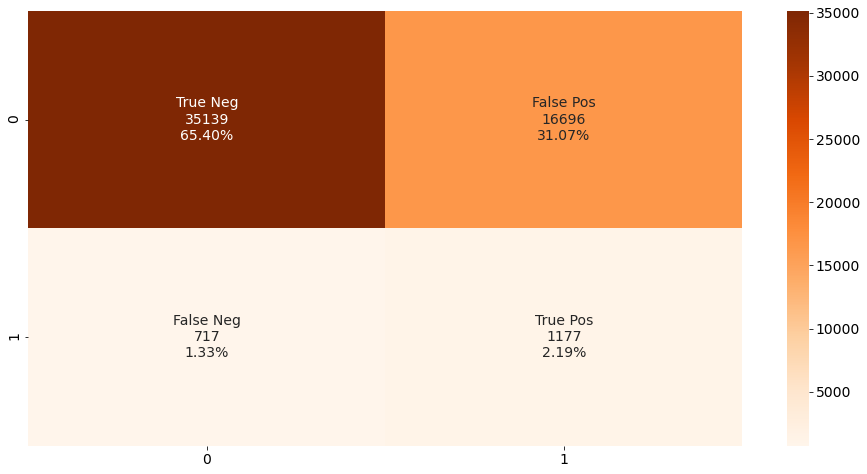

In [35]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Oranges')

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test_w_all, y_predict_w_all))

              precision    recall  f1-score   support

           0       0.98      0.68      0.80     51835
           1       0.07      0.62      0.12      1894

    accuracy                           0.68     53729
   macro avg       0.52      0.65      0.46     53729
weighted avg       0.95      0.68      0.78     53729



## A brief note on why not to use noramalization techniques

[Why not normalize yout data when fitting Logistic Regression?](https://stats.stackexchange.com/questions/48360/is-standardization-needed-before-fitting-logistic-regression)


[Regularization, standarization, normalization worsen model performance](https://www.turing.com/kb/effects-of-normalization-techniques-on-logistic-regression-in-data-science)

----------------------

### Conclusions